<a href="https://colab.research.google.com/github/hibatallahk/WebScrapping/blob/main/webTest2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Indeed Job Scraper

create a general purpose job scraper

In [1]:
import csv
from datetime import datetime
import requests
from bs4 import BeautifulSoup

In [2]:
def get_url(position, location):
    """Generate url from position and location"""
    template = 'https://ma.indeed.com/jobs?q={}&l={}'   
    position = position.replace(' ', '+')
    location = location.replace(' ', '+')
    url = template.format(position, location)
    return url

In [3]:
url = get_url('data scientist', 'Maroc')
print(url)

https://ma.indeed.com/jobs?q=data+scientist&l=Maroc


# Extract html data


In [4]:
response = requests.get(url)

In [5]:
soup = BeautifulSoup(response.text, 'html.parser')

In [6]:
cards = soup.find_all('div', 'slider_container')

In [7]:
len(cards)

15

# Prototype the model with a single record


In [8]:
#ok
card = cards[0]
card

<div class="slider_container"><div class="slider_list"><div class="slider_item"><div class="job_seen_beacon"><table cellpadding="0" cellspacing="0" class="jobCard_mainContent" role="presentation"><tbody><tr><td class="resultContent"><div class="heading4 color-text-primary singleLineTitle tapItem-gutter"><h2 class="jobTitle jobTitle-color-purple"><span title="Stage en Ingénieur Développement – Data Scientist ( Rabat ) à Rabat">Stage en Ingénieur Développement – Data Scientist ( Rabat )...</span></h2></div><div class="heading6 company_location tapItem-gutter"><pre><div class="companyLocation">Maroc</div></pre></div><div class="heading6 error-text tapItem-gutter"></div></td></tr></tbody></table><table class="jobCardShelfContainer" role="presentation"><tbody><tr class="jobCardShelf"></tr><tr class="underShelfFooter"><td><div class="heading6 tapItem-gutter result-footer"><div class="job-snippet">Poste pour Ingénieur à Rabat – Offre d’Emploi : Stage en Ingénieur Développement – Data Scientis

In [9]:
#ok
job_title = card.h2.span.get('title')
job_title

'Stage en Ingénieur Développement – Data Scientist ( Rabat ) à Rabat'

In [10]:
#not ok
company = card.find('span', 'companyName')
company

In [11]:
#ok
location = card.find('div', 'companyLocation').text
location

'Maroc'

In [12]:
#ok
job_summary = card.find('div', 'job-snippet').text.strip().replace('\n', ' ')
job_summary

'Poste pour Ingénieur à Rabat – Offre d’Emploi : Stage en Ingénieur Développement – Data Scientist ( Rabat ) : Rabat – . Dans le cadre de développement de…'

In [13]:
#ok
post_date = card.find('span', 'date').text
post_date

'Postedil y a 30+ jours'

In [14]:
#ok
today = datetime.today().strftime('%Y-%m-%d')
today

'2021-12-22'

In [15]:
#job_url = 'https://www.indeed.com' + card.h2.a.get('href')

url = card.a.get('href')
job_url = 'https://ma.indeed.com' + url
job_url

'https://ma.indeed.com/Maroc-emplois'

# Generalize the code

In [16]:
def get_record(card):
    """Extract job data from a single record"""
    job_title = card.h2.span.get('title')
    #company = card.find('span', 'companyName').text.strip()
    location = card.find('div', 'companyLocation').text.strip()
    post_date = card.find('span', 'date').text.strip()
    today = datetime.today().strftime('%Y-%m-%d')
    job_summary = card.find('div', 'job-snippet').text.strip().replace('\n', ' ')
    record = (job_title, location, post_date, today, job_summary)

    return record

In [17]:
records = []

for card in cards:
    record = get_record(card)
    records.append(record)

In [18]:
records[2]

('Junior data scientist',
 'Casablanca',
 'Postedil y a 30+ jours',
 '2021-12-22',
 'Mettre en œuvre les processus de structurations de la données (toutes sources confondues internes et externes). Sens de l’organisation et du travail en équipe ;')

#Getting the next page

In [19]:
url = 'https://ma.indeed.com' + soup.find('a',{'aria-label':'Suivant'}).get('href')

In [20]:
url

'https://ma.indeed.com/jobs?q=data+scientist&l=Maroc&start=10'

In [21]:
while True:
    try:
        url = 'https://ma.indeed.com' + soup.find('a',{'aria-label':'Suivant'}).get('href')
    except AttributeError:
        break

    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')
    cards = soup.find_all('div', 'job_seen_beacon')

    for card in cards:
        record = get_record(card)
        records.append(record)

In [22]:
len(records)

77

# Putting all together

In [23]:
import csv
from datetime import datetime
import requests
from bs4 import BeautifulSoup


def get_url(position, location):
    """Generate url from position and location"""
    template = 'https://ma.indeed.com/jobs?q={}&l={}'   
    position = position.replace(' ', '+')
    location = location.replace(' ', '+')
    url = template.format(position, location)
    return url


def get_record(card):
    """Extract job data from a single record"""
    job_title = card.h2.span.get('title')
    #company = card.find('span', 'companyName').text.strip()
    location = card.find('div', 'companyLocation').text.strip()
    job_summary = card.find('div', 'job-snippet').text.strip().replace('\n', ' ')
    post_date = card.find('span', 'date').text.strip()
    today = datetime.today().strftime('%Y-%m-%d')
    job_url = 'https://ma.indeed.com' + card.a.get('href')

    record = (job_title, location, post_date, today, job_summary)

    return record


def main(position, location):
    """Run the main program routine"""
    records = []
    url = get_url(position, location)
    
    # extract the job data
    while True:
        response = requests.get(url)
        soup = BeautifulSoup(response.text, 'html.parser')
        cards = soup.find_all('div', 'job_seen_beacon')
        for card in cards:
            record = get_record(card)
            records.append(record)
        try:
            url = 'https://ma.indeed.com' + soup.find('a',{'aria-label':'Suivant'}).get('href')
        except AttributeError:
            break
        
    # save the job data
    with open('results.csv', 'w', newline='', encoding='utf-8') as f:
        writer = csv.writer(f)
        writer.writerow(['JobTitle','Location', 'PostDate', 'ExtractDate', 'Summary'])
        writer.writerows(records)

In [24]:
main('data scientist', 'Maroc')

### Conclusion

- Ici, on a pu extraire les offres publiés, pour l'instant ces données sont brutes. Dans la prochaines parties, on va uniformiser nos données, afin de les visualiser et analyser les tendances.

# NLP and ML Analysis Part

In [25]:
!pip3 install transformers

In [26]:
import math
import re
import nltk
import spacy
import numpy as np
import pandas as pd
from PIL import Image # converting images into arrays
from datetime import datetime

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

# install wordcloud
#!pip install wordcloud 
import lightgbm as lgb

# import PyTorch and transformers libraries
import torch
import transformers

# import package and its set of stopwords
from wordcloud import WordCloud
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from tqdm.auto import tqdm
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import MinMaxScaler # for normalizing data

# import metrics
from sklearn import metrics
from sklearn.metrics import f1_score, precision_recall_curve

# import machine learning models
from sklearn.dummy import DummyClassifier # dummy classifier
from sklearn.linear_model import LogisticRegression # logistic regression
from sklearn.naive_bayes import MultinomialNB # naive bayes classifier
from lightgbm import LGBMClassifier # lightGBM classifier
from sklearn.linear_model import SGDClassifier # stochastic gradient classifier

import sys
import warnings # ignore warnings
warnings.filterwarnings("ignore")

print('Project libraries has been successfully been imported!')

Project libraries has been successfully been imported!


In [27]:
df = pd.read_csv('results.csv', sep=',')

In [28]:
df.tail()

,JobTitle,Location,PostDate,ExtractDate,Summary
72,Offre: Hardware developer,Maroc,Postedil y a 30+ jours,2021-12-22,Nous cherchons pour notre entité AgriEdge de l...
73,Offre: Scrum master,Rabat,Postedil y a 14 jours,2021-12-22,"As a data scientist, you are tasked with: Enab..."
74,Offre: Consultant big data,Casablanca,Postedil y a 30+ jours,2021-12-22,Ingénieur big data (spark/scala). Phd student ...
75,Data Scientist,Settat,Postedil y a 17 jours,2021-12-22,Present information using data visualization t...
76,Consultants et Architecte Data H/F,Casablanca,Postedil y a 30+ jours,2021-12-22,Afin de couvrir l’ensemble des besoins de nos ...


In [29]:
df.head()

,JobTitle,Location,PostDate,ExtractDate,Summary
0,Stage en Ingénieur Développement – Data Scient...,Maroc,Postedil y a 30+ jours,2021-12-22,Poste pour Ingénieur à Rabat – Offre d’Emploi ...
1,Data Scientist-(H/F),Maroc,Postedil y a 30+ jours,2021-12-22,"Développer des use cases de bout en bout, en c..."
2,Junior data scientist,Casablanca,Postedil y a 30+ jours,2021-12-22,Mettre en œuvre les processus de structuration...
3,Junior data scientist,Casablanca,Postedil y a 30+ jours,2021-12-22,Mettre en œuvre les processus de structuration...
4,Data Scientist H/F,Casablanca,Postedil y a 30+ jours,2021-12-22,Mesurer et étudie les indicateurs de pilotage ...


In [30]:
df.isna().sum()

JobTitle       2
Location       0
PostDate       0
ExtractDate    0
Summary        0
dtype: int64

In [31]:
df.duplicated().sum()

3

In [32]:
df['Location'].value_counts()

Maroc                 35
Casablanca            32
Rabat                  4
Settat                 1
Tanger                 1
Agadir                 1
Casablanca+ 1 lieu     1
Salé                   1
Témara                 1
Name: Location, dtype: int64

- On s'interesse plus aux colomnes `job_title` et `Summary`

In [33]:
df.describe()

,JobTitle,Location,PostDate,ExtractDate,Summary
count,75,77,77,77,77
unique,71,9,7,1,72
top,Junior data scientist,Maroc,Postedil y a 30+ jours,2021-12-22,Vous connaissez les meilleures pratiques du dé...
freq,2,35,69,77,2


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   JobTitle     75 non-null     object
 1   Location     77 non-null     object
 2   PostDate     77 non-null     object
 3   ExtractDate  77 non-null     object
 4   Summary      77 non-null     object
dtypes: object(5)
memory usage: 3.1+ KB


In [35]:
%matplotlib inline
%config InlineBackend.figure_format = 'png'
# the next line provides graphs of better quality on HiDPI screens
%config InlineBackend.figure_format = 'retina'

plt.style.use('seaborn')

In [36]:
# this is to use progress_apply, read more at https://pypi.org/project/tqdm/#pandas-integration
tqdm.pandas()

In [55]:
!pip install wordcloud

In [60]:
import nltk
from nltk.corpus import stopwords

# EDA

In [37]:
#drop na
df.dropna(inplace = True)

**First, let's convert the `PostDate`**

In [38]:
df['NbrOfDays'] = df.PostDate.str.extract('(\d+)')

In [39]:
df['NbrOfDays'].value_counts()

30    69
21     3
17     1
26     1
14     1
Name: NbrOfDays, dtype: int64

In [40]:
df['Location'].value_counts()

Maroc                 34
Casablanca            32
Rabat                  4
Settat                 1
Salé                   1
Agadir                 1
Casablanca+ 1 lieu     1
Témara                 1
Name: Location, dtype: int64

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75 entries, 0 to 76
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   JobTitle     75 non-null     object
 1   Location     75 non-null     object
 2   PostDate     75 non-null     object
 3   ExtractDate  75 non-null     object
 4   Summary      75 non-null     object
 5   NbrOfDays    75 non-null     object
dtypes: object(6)
memory usage: 4.1+ KB


In [42]:
df.NbrOfDays = df.NbrOfDays.astype('int64')

In [43]:
df['ExtractDate'] = df['ExtractDate'].astype('datetime64')

In [44]:
from datetime import datetime, timedelta

df['PostedDate'] = df['ExtractDate'] -  pd.to_timedelta(df['NbrOfDays'], unit='d')

In [45]:
df.head()

,JobTitle,Location,PostDate,ExtractDate,Summary,NbrOfDays,PostedDate
0,Stage en Ingénieur Développement – Data Scient...,Maroc,Postedil y a 30+ jours,2021-12-22,Poste pour Ingénieur à Rabat – Offre d’Emploi ...,30,2021-11-22
1,Data Scientist-(H/F),Maroc,Postedil y a 30+ jours,2021-12-22,"Développer des use cases de bout en bout, en c...",30,2021-11-22
2,Junior data scientist,Casablanca,Postedil y a 30+ jours,2021-12-22,Mettre en œuvre les processus de structuration...,30,2021-11-22
3,Junior data scientist,Casablanca,Postedil y a 30+ jours,2021-12-22,Mettre en œuvre les processus de structuration...,30,2021-11-22
4,Data Scientist H/F,Casablanca,Postedil y a 30+ jours,2021-12-22,Mesurer et étudie les indicateurs de pilotage ...,30,2021-11-22


- Let's add an index to our dataframe

In [46]:
df = df.reset_index()
df = df.rename(columns={"index":"id_job"})
df['id_job'] = df.index + 0

- Extract month/day/year from `PostedDate`

In [47]:
df['year'] = pd.DatetimeIndex(df['PostedDate']).year
df['month'] = pd.DatetimeIndex(df['PostedDate']).month
df['day'] = pd.DatetimeIndex(df['PostedDate']).day

- Let's check how many different jobs posted over days.

In [48]:
def clean_data(data):
    ''' 
    this function is used to clean 
    the data of non standard characters
    '''
    clean_data = re.sub(r"[^a-zA-Zéèàêâûù']", " ", data)
    clean_data = " ".join(clean_data.split())
    return clean_data.lower()
df['Summary'] = df['Summary'].apply(clean_data)
df['Summary'].head()

0    poste pour ingénieur à rabat offre d emploi st...
1    développer des use cases de bout en bout en co...
2    mettre en uvre les processus de structurations...
3    mettre en uvre les processus de structurations...
4    mesurer et étudie les indicateurs de pilotage ...
Name: Summary, dtype: object

In [52]:
df['Summary'].tail(20)

55    offre pour ingénieur à casablanca offre d empl...
56    conseiller d accueil agence hotel de ville mek...
57    effective utilisation of data and crm database...
58    teleperformance recrute un data scientist ja i...
59    stagiaire it data analyst big data geolocalisa...
60    chef de département data management h f phd st...
61    the digital product manager will oversee the d...
62    lead technique bi big data ingénieur big data ...
63    analyste p le data h f cedoc computer science ...
64    collection storage and interpretation of data ...
65    vous ma trisez l ensemble des solutions techni...
66    expert des ressources en eau poste proposé exp...
67    travailler en collaboration avec des experts e...
68    secteur d'activité automobile motos cycles fon...
69    secteur d'activité informatique fonction infor...
70    nous cherchons pour notre entité agriedge de l...
71    as a data scientist you are tasked with enabli...
72    ingénieur big data spark scala phd student

In [62]:
nltk.download()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------


KeyboardInterrupt: ignored

In [65]:
# Python program to generate WordCloud
 
# importing all necessary modules
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
 
 
comment_words = ''
import nltk
nltk.download('punkt')

from nltk import word_tokenize,sent_tokenize

stop_words: list = stopwords.words('english')
 
# iterate through the csv file
for val in df.Summary:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     

    for word_to_remove in ['pour', 'à', 'd', 'en', 'des', 'les', 'nous', 'as',
                           'a', 'de', 'l', 'nos', 'notre', 'avec', 'afin', 'are']:
                           if word_to_remove in df['Summary']:
                             stopwords = stopwords
                           else:
                             stopwords.append(word_to_remove)
        # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
                             # clean words        
cleaned_word = " ".join([word for word in comment_words.split() if (word != 'job' and word != 'poste' 
                                 and word not in stopwords)
                            ])
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(cleaned_word)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0) 
plt.show()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


LookupError: ignored

In [54]:
import urllib.request

urllib.request.urlretrieve('https://chuksooismywebsitebucket.s3.us-west-2.amazonaws.com/alice_mask.png')

# save mask to alice_mask 
alice_mask = np.array(Image.open('alice_mask.png'))

FileNotFoundError: ignored

In [49]:
print('Positive words')
wordcloud(df['Summary'], alice_mask)

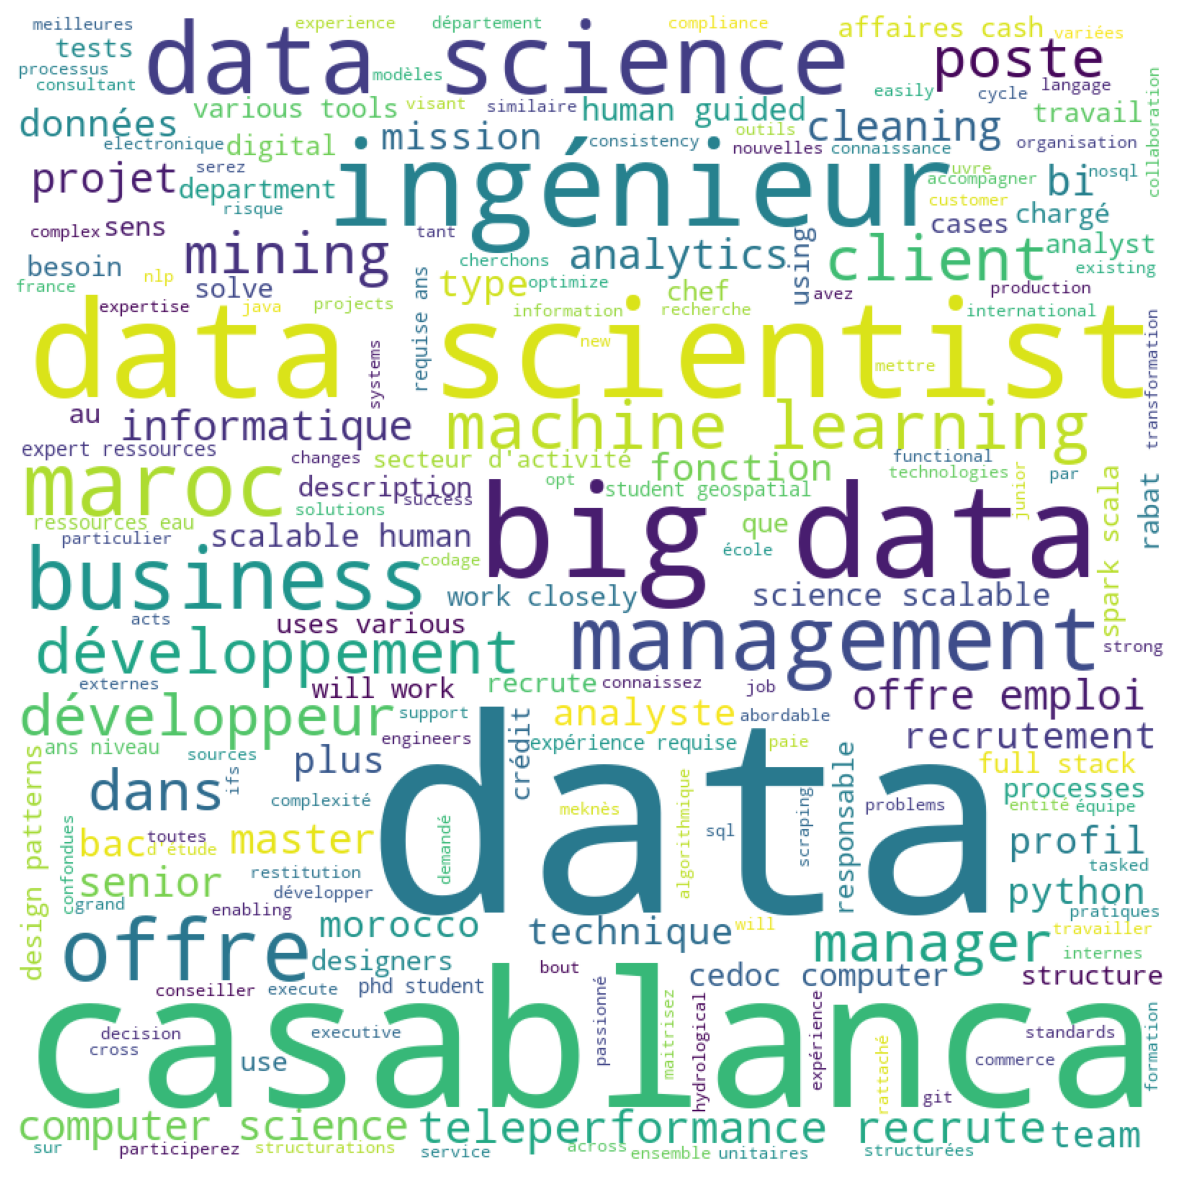

In [97]:
# Python program to generate WordCloud
 
# importing all necessary modules
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
 
# Reads 'Youtube04-Eminem.csv' file
 
comment_words = ''
stopwords = set(STOPWORDS)
stopwords.update(['pour', 'à', 'd','et', 'du', 'en','ou','vous','une','un', 'product','la','le', 'des', 'les', 'nous', 'as','a', 'de', 'l', 'nos', 'notre', 'avec', 'afin', 'are'])


 
# iterate through the csv file
for val in df.Summary:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()

     
    comment_words += " ".join(tokens)+" "


wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0) 
plt.show()

In [82]:
from collections import Counter

# create a dictionary of word frequencies
text_dictionary = wordcloud.process_text(comment_words)
# sort the dictionary
word_freq={k: v for k, v in sorted(text_dictionary.items(),reverse=True, key=lambda item: item[1])}

#use words_ to print relative word frequencies
rel_freq=wordcloud.words_

wordfreq = list(word_freq.items())[:1000]
#print results
print(list(word_freq.items())[:1000])
#print(list(rel_freq.items())[:30])
print()
print()
Counter(wordfreq)

[('de', 66), ('data', 45), ('et', 35), ('en', 32), ('le', 32), ('casablanca', 26), ('data scientist', 22), ('big data', 20), ('ingénieur', 16), ('pour', 14), ('du', 13), ('vous', 13), ('data science', 11), ('maroc', 9), ('de la', 9), ('offre', 8), ('business', 8), ('machine learning', 8), ('développement', 7), ('la', 7), ('ou', 7), ('poste', 6), ('mining', 6), ('management', 6), ('product', 6), ('manager', 6), ('développeur', 6), ('dans le', 6), ('teleperformance recrute', 6), ('recrute un', 6), ('avec', 5), ('senior', 5), ('cleaning', 5), ('analytics', 5), ('master', 5), ('bi', 5), ('informatique', 5), ('projet', 5), ('offre emploi', 5), ('computer science', 5), ('données', 4), ('bac', 4), ('plus', 4), ('mission', 4), ('python', 4), ('morocco', 4), ('client', 4), ('un', 4), ('analyste', 4), ('recrutement', 4), ('team', 4), ('type', 4), ('profil', 4), ('fonction', 4), ('nous', 4), ('technique', 4), ('expert', 4), ('cedoc computer', 4), ('science scalable', 4), ('scalable human', 4), ('

Counter({('accelerated', 1): 1,
         ('accounting', 1): 1,
         ('accueil', 1): 1,
         ('accurate', 1): 1,
         ('across', 2): 1,
         ('actualité', 1): 1,
         ('actuellement', 1): 1,
         ('administratives', 1): 1,
         ('advanced', 1): 1,
         ('affaires cash', 3): 1,
         ('affecté', 1): 1,
         ('afin', 1): 1,
         ('agence', 1): 1,
         ('agile', 1): 1,
         ('agriedge', 1): 1,
         ('ai', 1): 1,
         ('aide', 1): 1,
         ('ainsi', 1): 1,
         ('al', 1): 1,
         ('alertes', 1): 1,
         ('algorithms', 1): 1,
         ('analyser', 1): 1,
         ('analyses', 1): 1,
         ('analysis', 1): 1,
         ('analyst', 3): 1,
         ('analyste', 4): 1,
         ('analytics', 5): 1,
         ('anglophone', 1): 1,
         ('animateur', 1): 1,
         ('année', 1): 1,
         ('ans', 1): 1,
         ('ans niveau', 3): 1,
         ('applications', 1): 1,
         ('appétence', 1): 1,
         ('architecte

### Create a dictionary of word frequencies

In [85]:
# create a list of candidates
summary = df.Summary.unique()
#create a list of responses for each candidate using a list comprehension
corpus = [' '.join(df[(df.Summary==candidate)].Summary.tolist()) for candidate in summary]

# import CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

#instantiate a CountVectorizer object
# utilize the new STOP_WORDS list
cv=CountVectorizer( stop_words=STOPWORDS, ngram_range=(1, 3))

# fit transform our text and create a dataframe with the result
X = cv.fit_transform(corpus)
X = X.toarray()

bow=pd.DataFrame(X, columns = cv.get_feature_names())
bow.index=summary

In [88]:
bow

,abordable,abordable data,abordable data ingénieur,abordable data secteur,accelerated,accelerated mining,accelerated mining technology,accompagner,accompagner nos,accompagner nos clients,accounting,accounting required,accueil,accueil agence,accueil agence hotel,accurate,accurate details,accurate details clients,across,across business,across business systems,activité,activité automobile,activité automobile motos,activité informatique,activité informatique fonction,acts,acts business,actualité,actualité relative,actualité relative aux,actuellement,actuellement la,actuellement la recherche,administratives,administratives des,administratives des collaborateurs,advanced,advanced analytics,advanced analytics data,...,will oversee,will oversee design,will work,will work closely,work,work closely,work closely cross,work closely key,working,working partnership,working partnership business,écart,écart constates,écart constates et,école,école de,école de commerce,école ingénieur,école ingénieur ou,écosystème,écosystème data,écosystème data pandas,équipe,équipe mettre,équipe mettre en,étude,étude demandé,étude demandé bac,études,études connaissance,études connaissance client,étudie,étudie les,étudie les indicateurs,éventail,éventail expertises,éventail expertises et,êtes,êtes aise,êtes aise avec
poste pour ingénieur à rabat offre d emploi stage en ingénieur développement data scientist rabat rabat dans le cadre de développement de,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
développer des use cases de bout en bout en collaboration avec la digital factory ainsi que les lignes métiers,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
mettre en uvre les processus de structurations de la données toutes sources confondues internes et externes sens de l organisation et du travail en équipe,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
mesurer et étudie les indicateurs de pilotage des risques cout du risque cdl provisionnement ecl pd lgd rwa bac m et plus,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0
exploration des données à l aide d outils de data discovery qliksense et restitution des analyses réalisées,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
secteur d'activité informatique fonction informatique electronique multimédia internet expérience requise de à ans niveau d'étude demandé bac,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0
nous cherchons pour notre entité agriedge de l'université mohammed vi polytechnique un data scientist into a unified program create opt in opt out settings for,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
ingénieur big data spark scala phd student in geospatial big data and machine learning for hydrological decision support,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [91]:
# create a pandas Series of the top 4000 most frequent words
text=bow.loc['abordable'].sort_values(ascending=False)[:4000]

# create a dictionary Note: you could pass the pandas Series directoy into the wordcloud object
text2_dict=bow.loc['work'].sort_values(ascending=False).to_dict()

# create the WordCloud object
wordcloud = WordCloud(min_word_length =3,
                      background_color='white')

# generate the word cloud
wordcloud.generate_from_frequencies(text2_dict)

#plot
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

KeyError: ignored